### Pré-processamento

In [1]:
# Importando libs para análise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
# Obtendo dados
df = pd.read_csv('dataset.csv')
df.columns = df.columns.str.lower()
df.head()

,title,content
0,"Ato Declaratorio Interpretativo SRF nº 15, de ...","Ato Declaratório Interpretativo SRF nº 15, de ..."
1,"Ato Declaratorio nº 01, de 2013",* Publicado no DOE em 01/02/2013 ATO DECLARA...
2,"Ato Declaratorio nº 02, de 2013",* Publicado no DOE em 01/02/2013 ATO DECLARA...
3,"Ato Declaratório nº 01, de 1998",ATO DECLARATÓRIO Nº 01/1998 07/01/1998 * Publi...
4,"Ato Declaratório nº 01, de 1999",ATO DECLARATÓRIO Nº 01/1999 14/01/1999 * Publi...


In [3]:
# Tamanho do dataset
df.shape[0]

3606

### Verificando por dados faltantes

In [4]:
# Verificando por dados faltantes
df.isnull().sum()

title      0
content    2
dtype: int64

In [5]:
# Removendo dados faltantes
df.dropna(inplace=True)
# Novo tamanho do dataset
df.shape[0]

3604

### Verificando por ambiguidades

In [6]:
tipos_de_documentos = ["ato declaratório", "ato declaratorio", "decreto", "instrução normativa", 
                      "lei", "lei complementar", "norma de execução", "nota explicativa"]

In [7]:
df['title'].head()

0    Ato Declaratorio Interpretativo SRF nº 15, de ...
1                      Ato Declaratorio nº 01, de 2013
2                      Ato Declaratorio nº 02, de 2013
3                      Ato Declaratório nº 01, de 1998
4                      Ato Declaratório nº 01, de 1999
Name: title, dtype: object

In [8]:
def num_ocorrencias(documento):
    """Conta o número de ocorrências para cada tipo de classe de documento"""
    return df['title'].apply(lambda t: bool(re.match(documento, t.lower()))).sum()

def indices_ocorrencias(documento):
    """Gera uma lista de índices para cada ocorrência de tipo de classe de documento"""
    return df.index[df['title'].apply(lambda t: bool(re.match(documento, t.lower())))].tolist()


dist_documentos = [num_ocorrencias(documento) for documento in tipos_de_documentos]
indices_documentos = [indices_ocorrencias(documento) for documento in tipos_de_documentos]

In [9]:
indice = 0

print("Distribuição das classes:\n")

for documento, qtd in zip(tipos_de_documentos, dist_documentos):
    print(indice, documento, qtd)
    indice += 1

print("\nTotal:", sum(dist_documentos))

Distribuição das classes:

0 ato declaratório 669
1 ato declaratorio 3
2 decreto 1024
3 instrução normativa 1376
4 lei 331
5 lei complementar 72
6 norma de execução 117
7 nota explicativa 84

Total: 3676


Aparentemente, as classes 0 e 1 pertencem ao mesmo grupo (*ato declaratório*). Vamos defini-las como uma só:

In [10]:
# Índices das tuplas com título "ato declaratorio"
print(indices_documentos[1])

for i in range(3):
    df['title'].iloc[i] = df['title'].iloc[i].replace('Declaratorio', 'Declaratório')
    
df['title'].iloc[:3]

[0, 1, 2]


0    Ato Declaratório Interpretativo SRF nº 15, de ...
1                      Ato Declaratório nº 01, de 2013
2                      Ato Declaratório nº 02, de 2013
Name: title, dtype: object

Há alguma diferença no número de exemplares de classes total e o número total de dados?

In [11]:
df.shape[0], sum(dist_documentos)

(3604, 3676)

In [12]:
conjs_indices_documentos = [set(lista) for lista in indices_documentos]

# Observando se há interseções entre os índices dois a dois (i.e. se há dados com duas classes)
for i in range(0, 8):
    for j in range(0, 8):
        if i != j and set.intersection(conjs_indices_documentos[i], conjs_indices_documentos[j]):
            print(f"i: {i} j: {j}")

i: 4 j: 5
i: 5 j: 4


In [13]:
intersect_lista = [el for el in set.intersection(conjs_indices_documentos[4], conjs_indices_documentos[5])]
df['title'].iloc[df.index[intersect_lista]]

3077    Lei Complementar 0024, de 1975 (Cópia em Traba...
3078    Lei Complementar 0024, de 1975 (Cópia em Traba...
3079    Lei Complementar 0024, de 1975 (Cópia em Traba...
3080    Lei Complementar 0024, de 1975 (Cópia em Traba...
3081    Lei Complementar 0024, de 1975 (Cópia em Traba...
                              ...                        
3144                      Lei Complementar nº 50, de 2004
3145                      Lei Complementar nº 81, de 2009
3146                      Lei Complementar nº 81, de 2009
3147                               Lei n° 08.137, de 1990
3148                               Lei n° 08.397, de 1992
Name: title, Length: 72, dtype: object

Os dados supostamente ambíguos referem-se a títulos com a palavra "lei", mas definimos duas classes diferentes, i.e., "lei" e "lei complementar". Uma vez que a palavra *lei* é encontrada em ambos, não há problemas. Como a classe é contada duas vezes, retiremos a diferença:

In [14]:
sum(dist_documentos) - len(intersect_lista), df.shape[0] # (Diferença, Tamanho real do dataset)

(3604, 3604)

Aparentemente, não há ambiguidade nos títulos. Podemos separar os dados nas classes que definimos.

In [15]:
df.head()

,title,content
0,"Ato Declaratório Interpretativo SRF nº 15, de ...","Ato Declaratório Interpretativo SRF nº 15, de ..."
1,"Ato Declaratório nº 01, de 2013",* Publicado no DOE em 01/02/2013 ATO DECLARA...
2,"Ato Declaratório nº 02, de 2013",* Publicado no DOE em 01/02/2013 ATO DECLARA...
3,"Ato Declaratório nº 01, de 1998",ATO DECLARATÓRIO Nº 01/1998 07/01/1998 * Publi...
4,"Ato Declaratório nº 01, de 1999",ATO DECLARATÓRIO Nº 01/1999 14/01/1999 * Publi...


### Separando o dataset em classes

In [16]:
classes = ["ato declaratório", "decreto", "instrução normativa", "lei", "norma de execução", "nota explicativa"]

In [17]:
dist_classes = [num_ocorrencias(classe) for classe in classes]
{classe: qtd for classe, qtd in zip(classes, dist_classes)}

{'ato declaratório': 672,
 'decreto': 1024,
 'instrução normativa': 1376,
 'lei': 331,
 'norma de execução': 117,
 'nota explicativa': 84}

In [18]:
def define_classe(titulo):
    """Retorna a classe adequada para o titulo fornecido"""
    for classe in classes:
        if re.match(classe, titulo.lower()):
            return classe

df['doc_type'] = df['title'].apply(define_classe)        

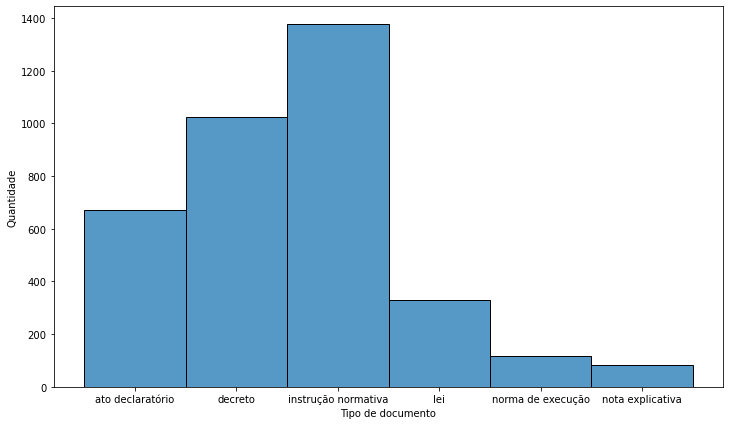

In [19]:
# Visualização da distribuição dos documentos
plt.figure(figsize=(12, 7))
sns.histplot(df['doc_type'])
plt.xlabel('Tipo de documento')
plt.ylabel('Quantidade')
plt.show()

In [20]:
# Valores absolutos
df['doc_type'].value_counts()

instrução normativa    1376
decreto                1024
ato declaratório        672
lei                     331
norma de execução       117
nota explicativa         84
Name: doc_type, dtype: int64

## Classificação

Import das bibliotecas necessárias

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from cf_matrix import make_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [23]:
categories = ['ato declaratório',
                'decreto',
                'instrução normativa',
                'lei',
                'norma de execução',
                'nota explicativa',
                ]

Separação dos dados em treino e teste

In [24]:
X = df['content']
y = df['doc_type']

A função abaixo é responsável por realizar a vetorização utilizando *CountVectorizer* e *TFidfVectorizer* e realizar os treinamentos em um modelo utilizando StratifiedKFold, com 3 folds por padrão.

In [50]:
def get_results(model, n_splits=3):
    kf = StratifiedKFold(n_splits=n_splits)
    kf.get_n_splits(X)
    
    results_c = []
    results_t = []
    
    for train_index, test_index in kf.split(X, y):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        c_vec = CountVectorizer()
        t_vec = TfidfVectorizer()

        X_train_c = c_vec.fit_transform(X_train)
        X_train_t = t_vec.fit_transform(X_train)

        X_test_c = c_vec.transform(X_test)
        X_test_t = t_vec.transform(X_test)

        clf = model.fit(X_train_c, y_train)

        pred = clf.predict(X_test_c)
        
        print("### RESULTADOS COM CountVectorizer ###")
        print(classification_report(y_test, pred))

        cm = confusion_matrix(y_test, pred)
        make_confusion_matrix(cm, categories=categories)
        plt.show()
        
        results_c.append(accuracy_score(y_test, pred))
        
        #####
        clf = model.fit(X_train_t, y_train)

        pred = clf.predict(X_test_t)

        print("### RESULTADOS COM TFidfVectorizer ###")
        print(classification_report(y_test, pred))

        cm = confusion_matrix(y_test, pred)
        make_confusion_matrix(cm, categories=categories)
        plt.show()
        
        results_t.append(accuracy_score(y_test, pred))
    
    avg_accuracy_c = np.mean(results_c)
    std_c = np.std(results_c)
    avg_accuracy_t = np.mean(results_t)
    std_t = np.std(results_t)
    
    return [avg_accuracy_c, std_c, avg_accuracy_t, std_t]

### Teste com classificadores: NaiveBayes, Decision Tree e Random Forest

#### NaiveBayes

### RESULTADOS COM CountVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      0.93      0.96       224
            decreto       0.42      0.97      0.59       342
instrução normativa       0.99      0.23      0.37       458
                lei       0.77      0.65      0.71       111
  norma de execução       0.89      0.21      0.33        39
   nota explicativa       0.00      0.00      0.00        28

           accuracy                           0.60      1202
          macro avg       0.68      0.50      0.49      1202
       weighted avg       0.78      0.60      0.56      1202



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


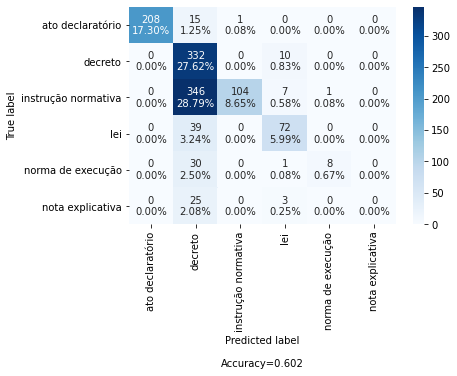

### RESULTADOS COM TFidfVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      0.70      0.82       224
            decreto       0.69      0.77      0.73       342
instrução normativa       0.68      0.98      0.81       458
                lei       0.00      0.00      0.00       111
  norma de execução       0.00      0.00      0.00        39
   nota explicativa       0.00      0.00      0.00        28

           accuracy                           0.72      1202
          macro avg       0.39      0.41      0.39      1202
       weighted avg       0.64      0.72      0.67      1202



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


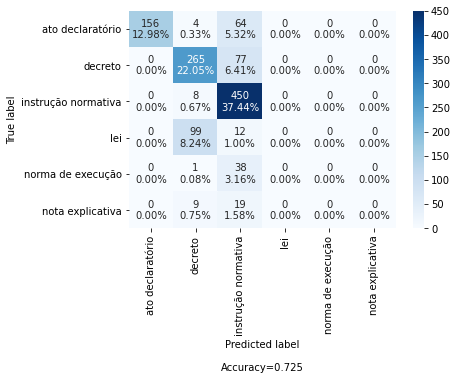

### RESULTADOS COM CountVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      0.95      0.97       224
            decreto       0.43      0.91      0.58       341
instrução normativa       0.97      0.30      0.45       459
                lei       0.62      0.68      0.65       110
  norma de execução       1.00      0.23      0.38        39
   nota explicativa       0.00      0.00      0.00        28

           accuracy                           0.62      1201
          macro avg       0.67      0.51      0.51      1201
       weighted avg       0.77      0.62      0.59      1201



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


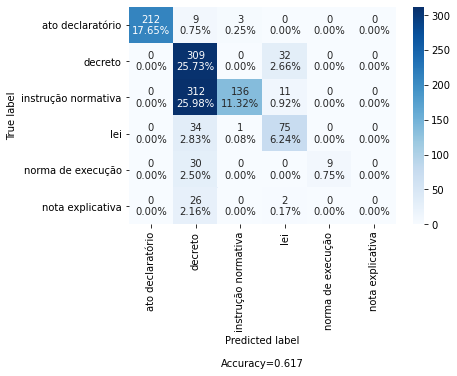

### RESULTADOS COM TFidfVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      0.79      0.89       224
            decreto       0.71      0.88      0.78       341
instrução normativa       0.72      0.95      0.82       459
                lei       0.00      0.00      0.00       110
  norma de execução       0.00      0.00      0.00        39
   nota explicativa       0.00      0.00      0.00        28

           accuracy                           0.76      1201
          macro avg       0.41      0.44      0.42      1201
       weighted avg       0.66      0.76      0.70      1201



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


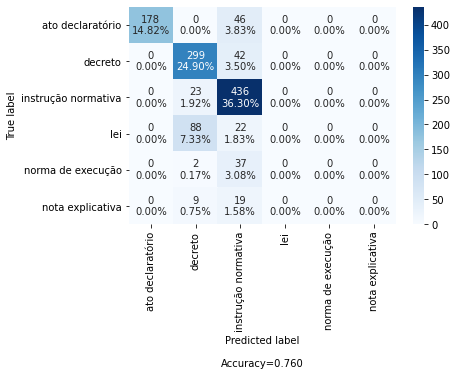

### RESULTADOS COM CountVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      0.99      0.99       224
            decreto       0.57      0.91      0.71       341
instrução normativa       0.98      0.65      0.78       459
                lei       0.74      0.79      0.77       110
  norma de execução       1.00      0.33      0.50        39
   nota explicativa       0.00      0.00      0.00        28

           accuracy                           0.78      1201
          macro avg       0.72      0.61      0.62      1201
       weighted avg       0.82      0.78      0.77      1201



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


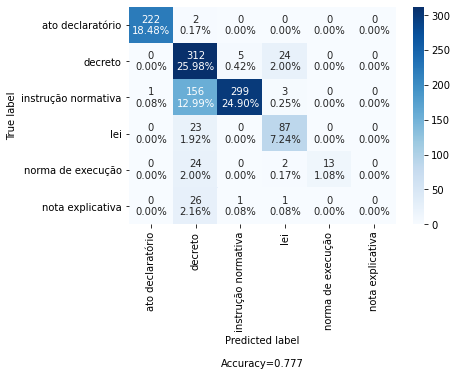

### RESULTADOS COM TFidfVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      0.83      0.91       224
            decreto       0.74      0.86      0.80       341
instrução normativa       0.73      0.98      0.84       459
                lei       0.00      0.00      0.00       110
  norma de execução       0.00      0.00      0.00        39
   nota explicativa       0.00      0.00      0.00        28

           accuracy                           0.78      1201
          macro avg       0.41      0.45      0.42      1201
       weighted avg       0.68      0.78      0.72      1201



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


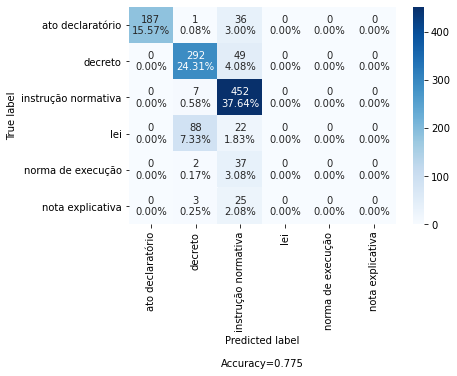

In [60]:
avg_accuracy_c, std_c, avg_accuracy_t, std_t = get_results(MultinomialNB())

In [61]:
print(f"A acurácia do classificador obteve uma média de {avg_accuracy_c:.4f} com desvio padrão de {std_c:.4f} para o CountVectorizer e uma média de {avg_accuracy_t:.4f} com desvio padrão de {std_t:.4f} para o TFidfVectorizer")

A acurácia do classificador obteve uma média de 0.6654 com desvio padrão de 0.0790 para o CountVectorizer e uma média de 0.7533 com desvio padrão de 0.0212 para o TFidfVectorizer


### Decision Tree

### RESULTADOS COM CountVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      1.00      1.00       224
            decreto       0.99      0.99      0.99       342
instrução normativa       0.98      1.00      0.99       458
                lei       1.00      0.96      0.98       111
  norma de execução       1.00      0.82      0.90        39
   nota explicativa       0.96      0.93      0.95        28

           accuracy                           0.99      1202
          macro avg       0.99      0.95      0.97      1202
       weighted avg       0.99      0.99      0.99      1202



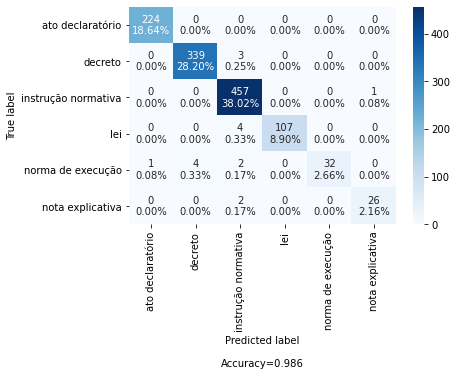

### RESULTADOS COM TFidfVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      0.99      0.99       224
            decreto       1.00      0.96      0.98       342
instrução normativa       0.96      1.00      0.98       458
                lei       0.97      1.00      0.99       111
  norma de execução       0.94      0.85      0.89        39
   nota explicativa       0.79      0.82      0.81        28

           accuracy                           0.98      1202
          macro avg       0.94      0.94      0.94      1202
       weighted avg       0.98      0.98      0.98      1202



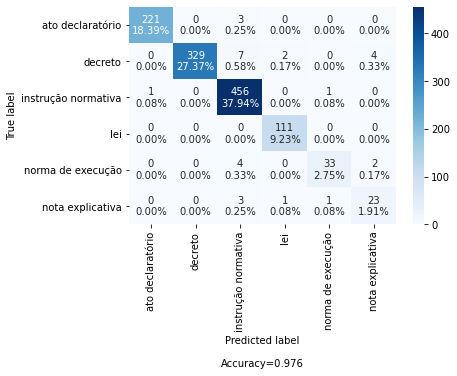

### RESULTADOS COM CountVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      0.99      0.99       224
            decreto       1.00      1.00      1.00       341
instrução normativa       1.00      0.99      1.00       459
                lei       0.97      1.00      0.99       110
  norma de execução       0.86      0.95      0.90        39
   nota explicativa       0.93      0.89      0.91        28

           accuracy                           0.99      1201
          macro avg       0.96      0.97      0.96      1201
       weighted avg       0.99      0.99      0.99      1201



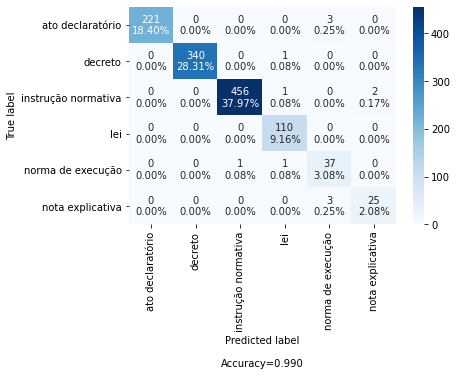

### RESULTADOS COM TFidfVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       0.98      0.99      0.99       224
            decreto       0.99      0.99      0.99       341
instrução normativa       0.99      0.98      0.99       459
                lei       0.96      0.98      0.97       110
  norma de execução       0.95      0.90      0.92        39
   nota explicativa       0.88      1.00      0.93        28

           accuracy                           0.98      1201
          macro avg       0.96      0.97      0.97      1201
       weighted avg       0.98      0.98      0.98      1201



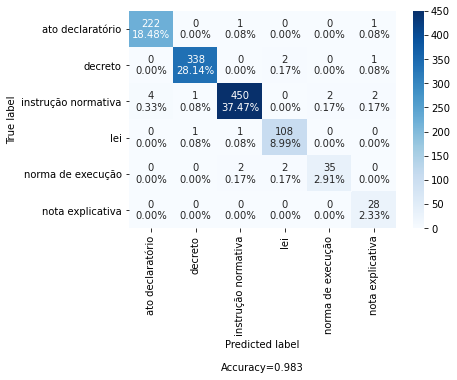

### RESULTADOS COM CountVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       0.99      1.00      1.00       224
            decreto       0.97      0.98      0.98       341
instrução normativa       0.99      0.97      0.98       459
                lei       0.98      0.94      0.96       110
  norma de execução       0.90      0.97      0.94        39
   nota explicativa       0.78      0.89      0.83        28

           accuracy                           0.98      1201
          macro avg       0.94      0.96      0.95      1201
       weighted avg       0.98      0.98      0.98      1201



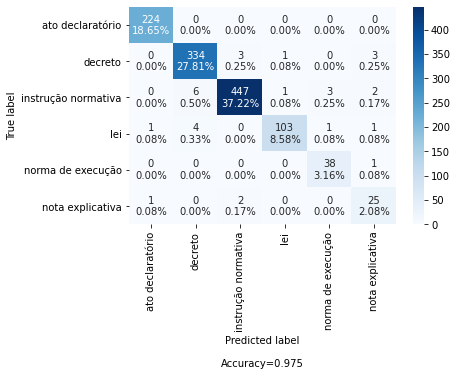

### RESULTADOS COM TFidfVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      1.00      1.00       224
            decreto       0.97      0.99      0.98       341
instrução normativa       1.00      0.98      0.99       459
                lei       0.98      0.94      0.96       110
  norma de execução       0.93      1.00      0.96        39
   nota explicativa       0.93      0.96      0.95        28

           accuracy                           0.98      1201
          macro avg       0.97      0.98      0.97      1201
       weighted avg       0.98      0.98      0.98      1201



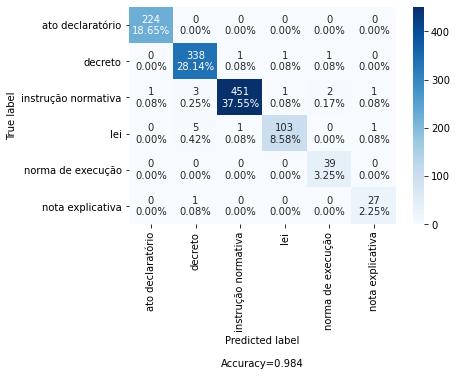

In [62]:
avg_accuracy_c, std_c, avg_accuracy_t, std_t = get_results(tree.DecisionTreeClassifier())

In [63]:
print(f"A acurácia do classificador obteve uma média de {avg_accuracy_c:.4f} com desvio padrão de {std_c:.4f} para o CountVectorizer e uma média de {avg_accuracy_t:.4f} com desvio padrão de {std_t:.4f} para o TFidfVectorizer")

A acurácia do classificador obteve uma média de 0.9836 com desvio padrão de 0.0063 para o CountVectorizer e uma média de 0.9811 com desvio padrão de 0.0037 para o TFidfVectorizer


#### Random Forest

### RESULTADOS COM CountVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       0.98      0.99      0.99       224
            decreto       0.96      1.00      0.98       342
instrução normativa       0.91      1.00      0.95       458
                lei       1.00      0.89      0.94       111
  norma de execução       1.00      0.15      0.27        39
   nota explicativa       1.00      0.43      0.60        28

           accuracy                           0.95      1202
          macro avg       0.97      0.74      0.79      1202
       weighted avg       0.95      0.95      0.93      1202



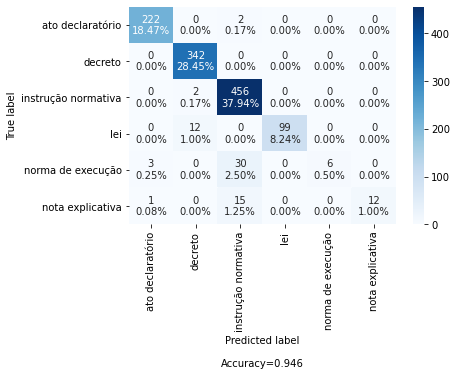

### RESULTADOS COM TFidfVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      0.99      0.99       224
            decreto       0.98      1.00      0.99       342
instrução normativa       0.89      1.00      0.94       458
                lei       1.00      0.91      0.95       111
  norma de execução       1.00      0.15      0.27        39
   nota explicativa       1.00      0.25      0.40        28

           accuracy                           0.95      1202
          macro avg       0.98      0.72      0.76      1202
       weighted avg       0.95      0.95      0.93      1202



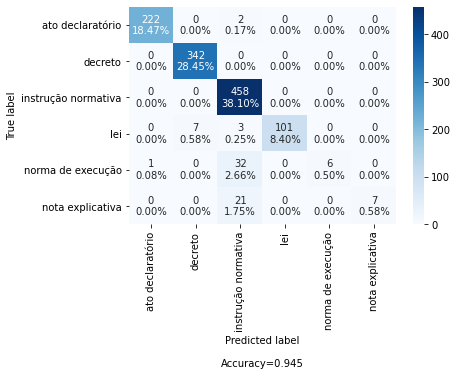

### RESULTADOS COM CountVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       0.99      1.00      1.00       224
            decreto       0.98      1.00      0.99       341
instrução normativa       0.91      1.00      0.95       459
                lei       1.00      0.97      0.99       110
  norma de execução       1.00      0.21      0.34        39
   nota explicativa       1.00      0.36      0.53        28

           accuracy                           0.96      1201
          macro avg       0.98      0.76      0.80      1201
       weighted avg       0.96      0.96      0.94      1201



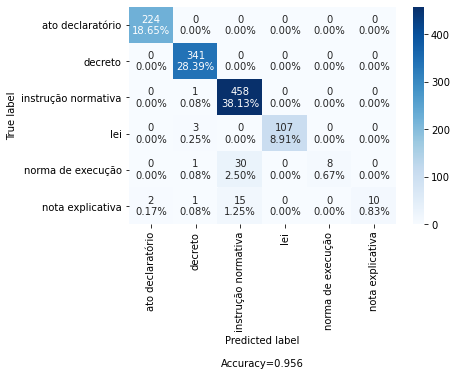

### RESULTADOS COM TFidfVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      0.99      0.99       224
            decreto       1.00      1.00      1.00       341
instrução normativa       0.90      1.00      0.95       459
                lei       1.00      0.98      0.99       110
  norma de execução       1.00      0.21      0.34        39
   nota explicativa       1.00      0.50      0.67        28

           accuracy                           0.96      1201
          macro avg       0.98      0.78      0.82      1201
       weighted avg       0.96      0.96      0.95      1201



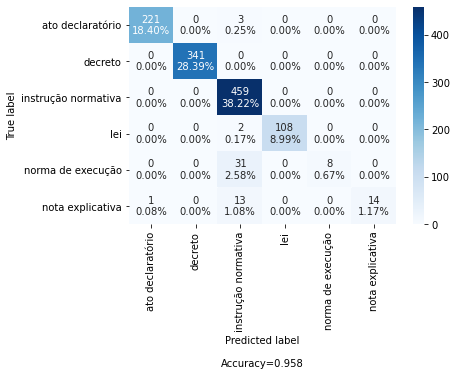

### RESULTADOS COM CountVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      1.00      1.00       224
            decreto       0.97      1.00      0.99       341
instrução normativa       0.89      0.99      0.94       459
                lei       1.00      0.95      0.98       110
  norma de execução       1.00      0.23      0.38        39
   nota explicativa       1.00      0.14      0.25        28

           accuracy                           0.95      1201
          macro avg       0.98      0.72      0.75      1201
       weighted avg       0.95      0.95      0.93      1201



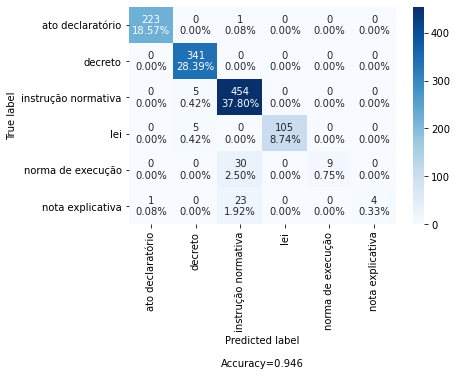

### RESULTADOS COM TFidfVectorizer ###
                     precision    recall  f1-score   support

   ato declaratório       1.00      1.00      1.00       224
            decreto       0.98      1.00      0.99       341
instrução normativa       0.90      1.00      0.95       459
                lei       1.00      0.95      0.97       110
  norma de execução       1.00      0.33      0.50        39
   nota explicativa       1.00      0.14      0.25        28

           accuracy                           0.95      1201
          macro avg       0.98      0.74      0.78      1201
       weighted avg       0.96      0.95      0.94      1201



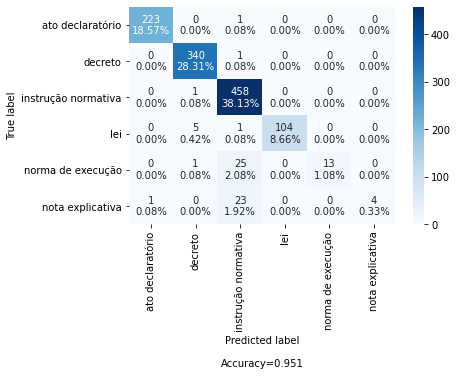

In [64]:
avg_accuracy_c, std_c, avg_accuracy_t, std_t = get_results(RandomForestClassifier())

In [65]:
print(f"A acurácia do classificador obteve uma média de {avg_accuracy_c:.4f} com desvio padrão de {std_c:.4f} para o CountVectorizer e uma média de {avg_accuracy_t:.4f} com desvio padrão de {std_t:.4f} para o TFidfVectorizer")

A acurácia do classificador obteve uma média de 0.9492 com desvio padrão de 0.0047 para o CountVectorizer e uma média de 0.9514 com desvio padrão de 0.0054 para o TFidfVectorizer


## Conclusão

É fácil ver pelos resultados que o classificador Decision Tree obteve os melhores resultados, apresentando resultados satisfatórios para a classificação de documentos da SEFAZ nas classes identificadas pela análise dos dados. Com ambos os vetorizadores, foram obtidos acurácias acima de 98% em média e com desvio padrão menor que 1%, então ambos são eficazes para a vetorização dos textos.